## Performing Basic EDA to understand the data set at Hand

In [1]:
## Loading the important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
%matplotlib inline

In [2]:
df_raw = pd.read_csv('C:/Lean_Skill_InterviewTest/data/beer-review-data-set.csv')
df_raw.head(5)

,index,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_aroma,review_overall,review_palate,review_taste,review_text,review_timeStruct,review_timeUnix,user_ageInSeconds,user_birthdayRaw,user_birthdayUnix,user_gender,user_profileName
0,40163,5.0,46634,14338,Chiostro,Herbed / Spiced Beer,4.0,4.0,4.0,4.0,4.0,Pours a clouded gold with a thin white head. N...,"{'min': 38, 'hour': 3, 'mday': 16, 'sec': 10, ...",1229398690,NaN,NaN,NaN,NaN,RblWthACoz
1,8135,11.0,3003,395,Bearded Pat's Barleywine,American Barleywine,4.0,3.5,3.5,3.5,3.0,12oz bottle into 8oz snifter.\t\tDeep ruby red...,"{'min': 38, 'hour': 23, 'mday': 8, 'sec': 58, ...",1218238738,NaN,NaN,NaN,NaN,BeerSox
2,10529,4.7,961,365,Naughty Nellie's Ale,American Pale Ale (APA),3.5,4.0,3.5,3.5,3.5,First enjoyed at the brewpub about 2 years ago...,"{'min': 7, 'hour': 18, 'mday': 26, 'sec': 2, '...",1101492422,NaN,NaN,NaN,Male,mschofield
3,44610,4.4,429,1,Pilsner Urquell,Czech Pilsener,3.0,3.0,2.5,3.0,3.0,First thing I noticed after pouring from green...,"{'min': 7, 'hour': 1, 'mday': 20, 'sec': 5, 'y...",1308532025,1.209827e+09,10-Aug-76,208508400.0,Male,molegar76
4,37062,4.4,4904,1417,Black Sheep Ale (Special),English Pale Ale,4.0,3.0,3.0,3.5,2.5,A: pours an amber with a one finger head but o...,"{'min': 51, 'hour': 6, 'mday': 12, 'sec': 48, ...",1299912708,NaN,NaN,NaN,NaN,Brewbro000


In [3]:
## Cheing the data types of each of these features
df_raw.dtypes

index                  int64
beer_ABV             float64
beer_beerId            int64
beer_brewerId          int64
beer_name             object
beer_style            object
review_appearance    float64
review_aroma         float64
review_overall       float64
review_palate        float64
review_taste         float64
review_text           object
review_timeStruct     object
review_timeUnix        int64
user_ageInSeconds    float64
user_birthdayRaw      object
user_birthdayUnix    float64
user_gender           object
user_profileName      object
dtype: object

In [4]:
## Checking the null values for the whole data franme
df_raw.isnull().sum()

index                    0
beer_ABV                 0
beer_beerId              0
beer_brewerId            0
beer_name                0
beer_style               0
review_appearance        0
review_aroma             0
review_overall           0
review_palate            0
review_taste             0
review_text             10
review_timeStruct        0
review_timeUnix          0
user_ageInSeconds    29644
user_birthdayRaw     29644
user_birthdayUnix    29644
user_gender          22186
user_profileName         5
dtype: int64

## Since most of the floats and integers that we need are in line with null handelling we just need to treat a few of them

In [5]:
df_raw["user_birthdayRaw"].fillna(0,inplace= True)
df_raw["review_text"].fillna(0,inplace= True)
df_raw["user_birthdayRaw"].fillna('unknwn',inplace= True)
df_raw["user_birthdayUnix"].fillna(0,inplace= True)
df_raw["user_gender"].fillna('unknwn',inplace= True)
df_raw["user_ageInSeconds"].fillna('user_ageInSeconds',inplace= True)
df_raw["user_profileName"].fillna('user_profileName',inplace= True)
df_raw.isnull().sum()

index                0
beer_ABV             0
beer_beerId          0
beer_brewerId        0
beer_name            0
beer_style           0
review_appearance    0
review_aroma         0
review_overall       0
review_palate        0
review_taste         0
review_text          0
review_timeStruct    0
review_timeUnix      0
user_ageInSeconds    0
user_birthdayRaw     0
user_birthdayUnix    0
user_gender          0
user_profileName     0
dtype: int64

In [6]:
#### Null handelling done ####

## ***lets Perform some EDA to understand the Data Set better***
### Total beer count

In [7]:
No_of_beers = df_raw.groupby('beer_name')['beer_brewerId'].nunique()
print('Total unique beers here are',len(No_of_beers))

Total unique beers here are 1688


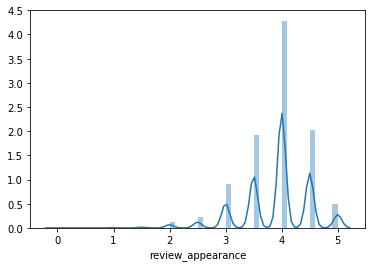

In [8]:
#histogram
sns.distplot(df_raw['review_appearance']);

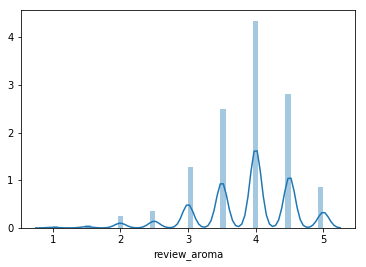

In [9]:
#histogram
sns.distplot(df_raw['review_aroma']);

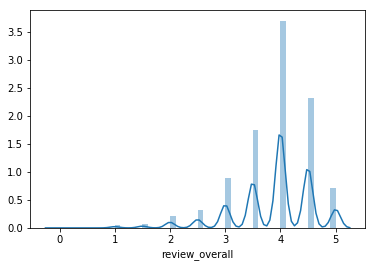

In [10]:
#histogram
sns.distplot(df_raw['review_overall']);

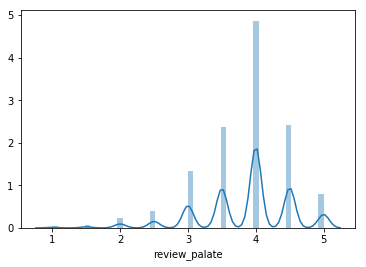

In [11]:
#histogram
sns.distplot(df_raw['review_palate']);

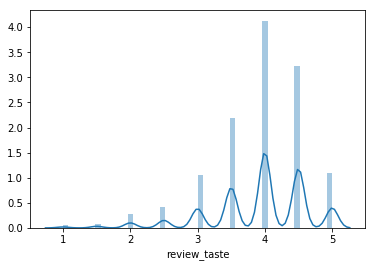

In [12]:
#histogram
sns.distplot(df_raw['review_taste']);

### *** Data set basically skewed towards a more 4 per beer average rating for each of the beers. These can be assesed biased reviews or just a short image review ***

In [13]:
df_raw['avg_rating'] = df_raw.apply(lambda x: x['review_appearance'] + x['review_taste']+x['review_palate']+x['review_overall'], axis=1)
df_raw['avg_rating']=df_raw['avg_rating']/5
df_raw['avg_rating']
df_raw.dtypes


index                  int64
beer_ABV             float64
beer_beerId            int64
beer_brewerId          int64
beer_name             object
beer_style            object
review_appearance    float64
review_aroma         float64
review_overall       float64
review_palate        float64
review_taste         float64
review_text           object
review_timeStruct     object
review_timeUnix        int64
user_ageInSeconds     object
user_birthdayRaw      object
user_birthdayUnix    float64
user_gender           object
user_profileName      object
avg_rating           float64
dtype: object

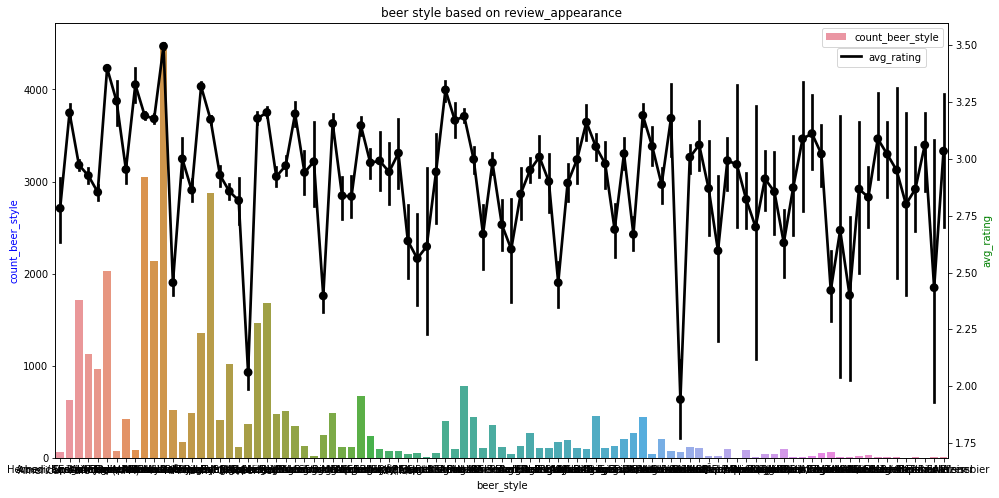

In [14]:
fig, ax1 = plt.subplots(figsize=(16, 8))
plt.title("beer style based on review_appearance")
sns.countplot(x='beer_style', data=df_raw, ax=ax1)
ax1.set_ylabel('count_beer_style', color='b')
plt.legend(['count_beer_style'])
ax2 = ax1.twinx()
sns.pointplot(x="beer_style", y="avg_rating", data=df_raw, ci=99, ax=ax2, color='black')
ax2.set_ylabel('avg_rating', color='g')
plt.legend(['avg_rating'], loc=(0.875, 0.9))
plt.grid(False)

##### Based on this graph we can say on average the rating off a lot of beers is good but since they have a low sample size maybe they are not sold enough

In [15]:
## Top 20 Beers
Top_20_beers=df_raw.groupby('beer_name')['index'].count().nlargest(20).reset_index().rename(columns={'beer_name':'beer_name','index' : 'beer_name_count'})
Top_20_beers['Top_20_Beers']='Top_20'
Top_20_beers=pd.DataFrame(Top_20_beers)
Top_20_beers.drop(['beer_name_count'],axis=1)

### Top 20 Beer styles 
Top_20_beersstyles=df_raw.groupby('beer_style')['index'].count().nlargest(20).reset_index().rename(columns={'beer_style':'beer_style','index' : 'beer_style_count'})
Top_20_beersstyles['Top_20_Styles']='Top_20'
Top_20_beersstyles=pd.DataFrame(Top_20_beersstyles)
Top_20_beersstyles.drop(['beer_style_count'],axis=1)

,beer_style,Top_20_Styles
0,American Double / Imperial Stout,Top_20
1,American IPA,Top_20
2,American Double / Imperial IPA,Top_20
3,Scotch Ale / Wee Heavy,Top_20
4,Russian Imperial Stout,Top_20
5,American Pale Ale (APA),Top_20
6,American Porter,Top_20
7,Rauchbier,Top_20
8,Rye Beer,Top_20
9,Czech Pilsener,Top_20


In [16]:
df_raw=pd.merge(df_raw,Top_20_beers, how='left', on = 'beer_name')
df_raw=pd.merge(df_raw,Top_20_beersstyles, how='left', on ='beer_style')

In [19]:
df_raw_top_20_beers=df_raw[df_raw["Top_20_Beers"]=='Top_20']
df_raw_top_20_styles=df_raw[df_raw["Top_20_Styles"]=='Top_20']
df_raw_top_20_beers

,index,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_aroma,review_overall,review_palate,...,user_ageInSeconds,user_birthdayRaw,user_birthdayUnix,user_gender,user_profileName,avg_rating,beer_name_count,Top_20_Beers,beer_style_count,Top_20_Styles
3,44610,4.4,429,1,Pilsner Urquell,Czech Pilsener,3.0,3.0,2.5,3.0,...,1.20983e+09,10-Aug-76,208508400.0,Male,molegar76,2.3,947.0,Top_20,1131.0,Top_20
10,23198,8.5,7463,1199,Founders Dirty Bastard,Scotch Ale / Wee Heavy,4.5,4.5,4.5,4.5,...,user_ageInSeconds,0,0.0,unknwn,MattyG85,3.6,983.0,Top_20,2133.0,Top_20
11,18518,10.5,21822,1199,Founders Imperial Stout,Russian Imperial Stout,4.5,4.0,4.0,4.0,...,user_ageInSeconds,0,0.0,unknwn,BeRanger,3.3,805.0,Top_20,2032.0,Top_20
12,32481,11.2,19960,1199,Founders KBS (Kentucky Breakfast Stout),American Double / Imperial Stout,4.5,4.5,5.0,4.5,...,user_ageInSeconds,0,0.0,unknwn,YonderWanderer,3.8,1441.0,Top_20,4495.0,Top_20
15,20012,8.3,11757,1199,Founders Breakfast Stout,American Double / Imperial Stout,3.0,3.0,4.0,4.0,...,user_ageInSeconds,0,0.0,unknwn,AprilMarie,3.1,1883.0,Top_20,4495.0,Top_20
19,29757,7.2,5441,1199,Founders Centennial IPA,American IPA,3.5,3.5,4.0,4.0,...,1.20387e+09,18-Oct-76,214470000.0,Male,hustlemuscle,3.0,1064.0,Top_20,3050.0,Top_20
20,19174,10.5,21822,1199,Founders Imperial Stout,Russian Imperial Stout,4.5,4.5,4.0,4.0,...,user_ageInSeconds,0,0.0,unknwn,vandemonian,3.4,805.0,Top_20,2032.0,Top_20
23,16164,12.0,17538,1199,Founders Devil Dancer,American Double / Imperial IPA,4.0,4.0,4.0,4.5,...,user_ageInSeconds,0,0.0,unknwn,Jmoore50,3.3,800.0,Top_20,2872.0,Top_20
27,20991,8.3,11757,1199,Founders Breakfast Stout,American Double / Imperial Stout,4.0,4.0,4.5,4.0,...,user_ageInSeconds,0,0.0,Male,bluemoonswoon,3.4,1883.0,Top_20,4495.0,Top_20
28,16520,12.0,17538,1199,Founders Devil Dancer,American Double / Imperial IPA,4.0,3.5,4.0,4.0,...,user_ageInSeconds,0,0.0,unknwn,Cresant,3.2,800.0,Top_20,2872.0,Top_20


In [ ]:
### Making box plots to find out if we have some outliers in eithe on of the two cases of beer names or beer styles

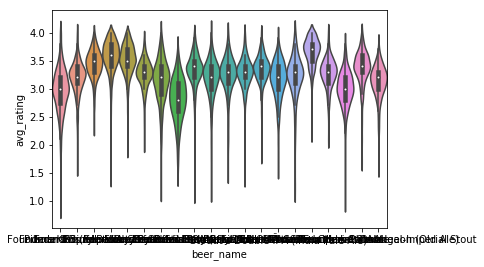

In [48]:
sns.violinplot(x='beer_name', y='avg_rating', data=df_raw_top_20_beers,size=100, aspect=200,width=1,scale="width")

#### As it cab be seen there are a lot of outliers in the average rating most of the rating again fall in the 2.5 -4 point range out of 5 on average

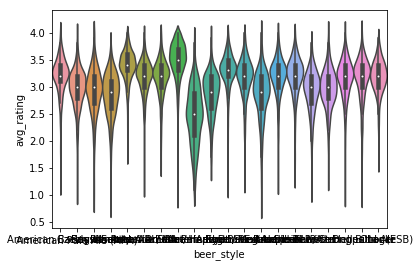

In [51]:
sns.violinplot(x='beer_style', y='avg_rating', data=df_raw_top_20_styles,size=100, aspect=200,width=1,scale="width")

#### As it cab be seen there are a lot of outliers in the average rating most of the rating again fall in the 2.5 -4 point range out of 5 on average

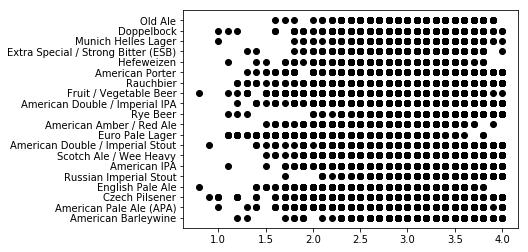

In [54]:
plt.scatter(x =df_raw_top_20_styles.avg_rating,y = df_raw_top_20_styles.beer_style,c = 'black')
plt.show()
#we can see the outlier in the below image

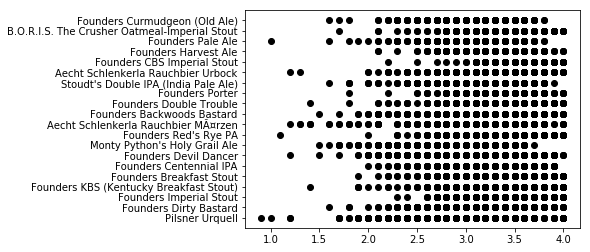

In [64]:
plt.scatter(x =df_raw_top_20_beers.avg_rating,y = df_raw_top_20_beers.beer_name,c = 'black')
plt.show()
#we can see the outlier in the below image

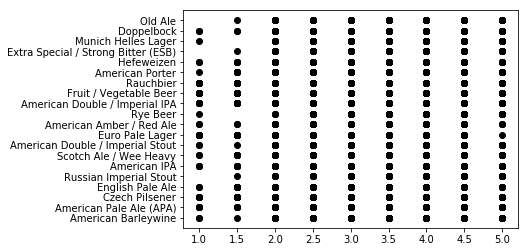

In [60]:
x1=df_raw_top_20_styles.review_appearance
x2=df_raw_top_20_styles.review_aroma
x3=df_raw_top_20_styles.review_overall
x4=df_raw_top_20_styles.review_palate
x5=df_raw_top_20_styles.review_taste




plt.scatter(x = x5 ,y = df_raw_top_20_styles.beer_style,c = 'black')
plt.show()
#we can see the outlier in the below image

#### Average Ratings of the beers tell us a diffrent picture as compared to the normal interlinkages between the varaibles at hand.

In [ ]:
styles = pd.DataFrame()
labels = df_raw.groupby(['beer_style']).size() 
styles['count'] = labels
styles['style'] = labels.index
styles = styles.sort_values(by='count', ascending=False)
fig, ax = plt.subplots()
fig.set_size_inches(8,19)
sns.barplot(x='count', y='style', data=styles, ax=ax, palette="coolwarm", edgecolor="k")
plt.title("count of each beer style's reviews", size=16)
plt.ylabel('style', size=16)
plt.xlabel('count', size=16)
plt.show()

In [ ]:
# COMBINE SIMILAR STYLES OF BEER.  
df_raw['beer_style'].replace('Saison / Farmhouse Ale', 'Farm Ale', inplace=True)
df_raw['beer_style'].replace('Bière de Garde', 'Farm Ale', inplace=True)
df_raw['beer_style'].replace('American IPA', 'IPA', inplace=True)
df_raw['beer_style'].replace('English India Pale Ale (IPA)', 'IPA', inplace=True)
df_raw['beer_style'].replace('Belgian IPA', 'IPA', inplace=True)
df_raw['beer_style'].replace('Scotch Ale / Wee Heavy', 'Scottish Ale', inplace=True)
df_raw['beer_style'].replace('American Pale Ale (APA)', 'Pale Ale', inplace=True)
df_raw['beer_style'].replace('English Pale Ale', 'Pale Ale', inplace=True)
df_raw['beer_style'].replace('Belgian Pale Ale', 'Pale Ale', inplace=True)
df_raw['beer_style'].replace('American Brown Ale', 'Brown Ale', inplace=True)
df_raw['beer_style'].replace('English Brown Ale', 'Brown Ale', inplace=True)
df_raw['beer_style'].replace('English Dark Mild Ale', 'Brown Ale', inplace=True)
df_raw['beer_style'].replace('American Stout', 'Stout', inplace=True)
df_raw['beer_style'].replace('English Stout', 'Stout', inplace=True)
df_raw['beer_style'].replace('Milk / Sweet Stout', 'Stout', inplace=True)
df_raw['beer_style'].replace('Oatmeal Stout', 'Stout', inplace=True)
df_raw['beer_style'].replace('Oatmeal Stout', 'Stout', inplace=True)
df_raw['beer_style'].replace('American Double / Imperial Stout', 'Imperial Stout', inplace=True)
df_raw['beer_style'].replace('Russian Imperial', 'Imperial Stout', inplace=True)
df_raw['beer_style'].replace('American Porter', 'Porter', inplace=True)
df_raw['beer_style'].replace('Baltic Porter', 'Porter', inplace=True)
df_raw['beer_style'].replace('English Porter', 'Porter', inplace=True)
df_raw['beer_style'].replace('American Amber / Red Lager', 'Lager', inplace=True)
df_raw['beer_style'].replace('Vienna Lager', 'Lager', inplace=True)
df_raw['beer_style'].replace('German Pilsener', 'Lager', inplace=True)
df_raw['beer_style'].replace('Munich Helles Lager', 'Lager', inplace=True)
df_raw['beer_style'].replace('American Adjunct Lager', 'American Lager', inplace=True)
df_raw['beer_style'].replace('American Pale Lager', 'American Lager', inplace=True)
df_raw['beer_style'].replace('American Barleywine', 'Barleywine', inplace=True)
df_raw['beer_style'].replace('English Barleywine', 'Barleywine', inplace=True)
df_raw['beer_style'].replace('English Bitter', 'Bitter', inplace=True)
df_raw['beer_style'].replace('Extra Special / Strong Bitter (ESB)', 'Bitter', inplace=True)
df_raw['beer_style'].replace('American Pale Wheat Ale', 'Wheat', inplace=True)
df_raw['beer_style'].replace('Witbier', 'Wheat', inplace=True)
df_raw['beer_style'].replace('Witbier', 'Wheat', inplace=True)

# remove uncommon styles (in EDA, I found 13 styles with fewer than 60 reviews)
#uncommon = [ 'American Dark Wheat Ale','Bière de Champagne / Bière Brut', 'Black & Tan', 
#            'Eisbock', 'Faro', 'Gueuze', 'Happoshu', 'Japanese Rice Lager', 'Kristalweizen',
#            'Kvass', 'Lambic - Unblended','Roggenbier', 'Sahti' ]   
labels = df_raw.groupby(['beer_style']).size() 
uncommon = labels[labels<160]
df_raw = df_raw.loc[~df_raw['beer_style'].isin(uncommon.index)]
print('length without uncommon styles',len(df_raw))

In [ ]:
print(len(uncommon), 'styles excluded:')
print(uncommon.index)

In [ ]:
labels.IPA

In [ ]:
labels = df_raw.groupby(['beer_style']).size()
print(labels.sort_values(ascending=False))

In [ ]:
print('percent of beers in Wheatwine style:', labels.Wheatwine/len(df_raw))
print('percent of beers in Hefeweizen style:', labels.Hefeweizen/len(df_raw))
print('percent of beers in Lager style:', labels.Lager/len(df_raw))
print('percent of beers in Porter style:', labels.Porter/len(df_raw))
print('percent of beers in Tripel style:', labels.Tripel/len(df_raw))
print('percent of beers in Bitter style:', labels.Bitter/len(df_raw))

In [ ]:
styles = df_raw.groupby(['beer_style']).size() 
print('Number of styles used:', len(styles))
print('')
print(styles.index)

In [ ]:
# re do styles frequency chart with consolidated categories
import seaborn as sns
styles = pd.DataFrame()
labels = df_raw.groupby(['beer_style']).size() 
styles['count'] = labels
styles['style'] = labels.index
styles = styles.sort_values(by='count', ascending=False)
fig, ax = plt.subplots()
fig.set_size_inches(8,19)
sns.barplot(x='count', y='style', data=styles, ax=ax, palette="coolwarm", edgecolor="k")
plt.title("count of each beer style's reviews", size=16)
plt.ylabel('style', size=16)
plt.xlabel('count', size=16)
plt.show()

### ***Much cleaner way of the Most consumed beers lets now see ,Let us check the ABV for all these beers***